# Определение стоимости автомобилей

<div style="border:solid blue 2px; padding: 20px">
Привет Андрей! Меня зовут Андрей Петрушин, я буду проверять твой проект. Предлагаю общаться на «ты», это упрощает коммуникацию :) Но если это некомфортно - можем перейти на “Вы”.

Вижу, что ты много работал над проектом и он выполнен на хорошем уровне. Моя основная цель при проверке работы — помочь сделать проект лучше и возможно, поделиться своим опытом решения подобных задач.

Я буду делать комментарии четырьмя цветами:

<font color='blue'>Комментарий ревьювера синий текст - просто текст комментария</font>
    
<font color="green">Комментарий ревьювера    
✔️ зеленый текст - все отлично, хорошее решение</font>
    
<font color="brown">Комментарий ревьювера    
⚠️ Коричневый текст - есть рекомендации, в другой раз можно сделать иначе</font>
    
<font color="red">Комментарий ревьювера   
❌ красный текст - есть недочеты, их нужно исправить и проект будет принят</font>
    
Пожалуйста, не удаляй мои комментарии, нам обоим будет проще разобраться в недочетах, что и как исправлено. Желательно реагировать на каждый оранжевый и красный комментарии. Свои комментарии тоже отмечай, например другим цветом или надписью “Комментарий студента”. 

\<font color='darkblue'> Этот код позволяет менять цвет текста. \</font>
</div>


Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Описание даных:
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

<font color="green">Комментарий ревьювера   
✔️ Отлично, что приведено описание задачи - это очень важная часть любого проекта.</font>

<font color="brown">Комментарий ревьювера   
⚠️ Желательно еще приводить описание данных. Не всегда из названий колонок очевидно, какие данных в них находятся :) </font>


<div class="alert alert-info"> <b>Комментарий студента:</b> Описание данных добавил. </div>  
 

<font color="green">Комментарий ревьювера 2    
✔️ Хорошо!</font>

## Импорт библиотек

In [127]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse 

import time
import datetime
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
def line():
    print('________________________________________________')


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


RND = 12345

<font color="green">Комментарий ревьювера   
✔️ Верно -  весь импорт библиотек в начале проекта</font>


## Подготовка данных

In [128]:
data = pd.read_csv('/datasets/autos.csv')
display(data.head(5))
line()
data.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           

In [129]:
#названия столбцов в нижний регистр
new_columns = data.columns.str.lower()
data.set_axis(new_columns, axis = 'columns', inplace = True)

<font color="green">Комментарий ревьювера   
✔️ Хорошо, что приводишь к нижнему регистру. </font>
    
<font color="brown">Комментарий ревьювера   
⚠️ Еще можно разделить слова нижним подчёркиванием, чтобы совсем по PEP-8.</font>

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласен с тобой, но если честно какого то красивого способа я не знаю, а переименовывать в ручную поленился </div>  

<font color="green">Комментарий ревьювера 2    
✔️ Хорошо
</font>

In [130]:
print('Количество пропусков :', data.isnull().sum(), sep="\n")
line()
print('Количество дубликатов :', data.duplicated().sum())

Количество пропусков :
datecrawled              0
price                    0
vehicletype          37490
registrationyear         0
gearbox              19833
power                    0
model                19705
kilometer                0
registrationmonth        0
fueltype             32895
brand                    0
notrepaired          71154
datecreated              0
numberofpictures         0
postalcode               0
lastseen                 0
dtype: int64
________________________________________________
Количество дубликатов : 4


Данные загружены.
- Имеем датасет 16 столбцов и 354369 строк
- Дубликатов 4 штуки. Удалим.
- Очень много пропусков. В столбце notrepaired 71154 пропуска. Осмелюсь предположить что пропуск означает, что авто не ремонтировалось. Заменю пропуски на no. От остальных пропусков избавлюсь.

In [131]:
display(data.describe())
display(data.describe(include=['object', 'float', 'int']))

,price,registrationyear,power,kilometer,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
count,354369,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215,354369,354369.0,354369.000000,354369
unique,271174,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,179150
top,2016-03-24 14:49:47,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,17
mean,NaN,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN,NaN,0.0,50508.689087,NaN
std,NaN,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN,NaN,0.0,25783.096248,NaN
min,NaN,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30165.000000,NaN
50%,NaN,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49413.000000,NaN
75%,NaN,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71083.000000,NaN


In [132]:
#cars_for_free = data.query('price == 0')
#cars_for_free.shape

In [133]:
# наврятли автомобиль может стоить меньше 300 евро. Удалю выбросы.
data = data.query('price >= 300') 


Text(0, 0.5, 'Количество')

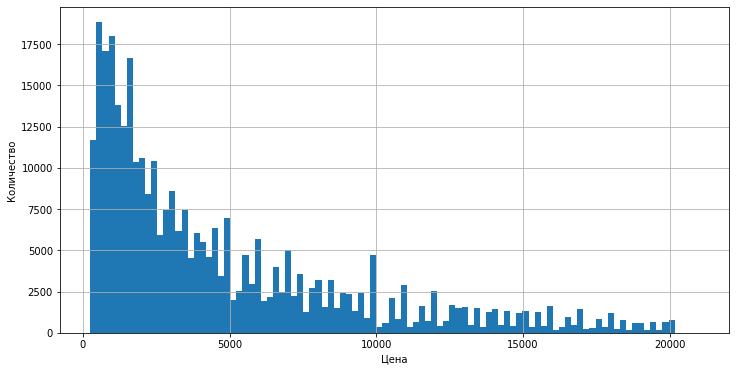

In [139]:
fig, ax = plt.subplots()
data['price'].plot(kind = 'hist', bins = 100, grid = True, range =(250, 21000), figsize = (12, 6))
ax.set_xlabel('Цена')
ax.set_ylabel('Количество')

In [140]:
# значения меньше 30 не совсем реальны как и значения 20000, отфильтрую.
data = data.query('30 < power < 400')

In [141]:
#cars_zero_power = data.query('power == 0')
#cars_zero_power.shape
data.shape

(297668, 16)

Text(0, 0.5, 'Количество')

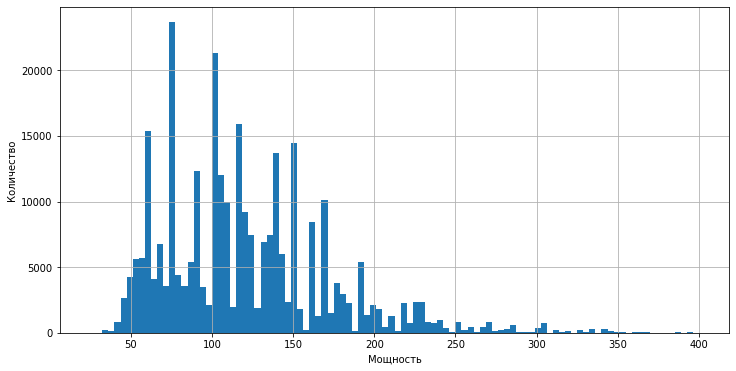

In [143]:

fig, ax = plt.subplots()
data['power'].plot(kind = 'hist', bins = 100, grid = True, range =(25, 400), figsize = (12, 6))
ax.set_xlabel('Мощность')
ax.set_ylabel('Количество')

In [144]:
#Определение периода регистрации авто
#d=data['registrationyear'].unique()
#d.sort()
#d


In [145]:
#Фильтрация столбца регистрации авто
data = data.query('1960 < registrationyear < 2020')

Text(0, 0.5, 'Количество')

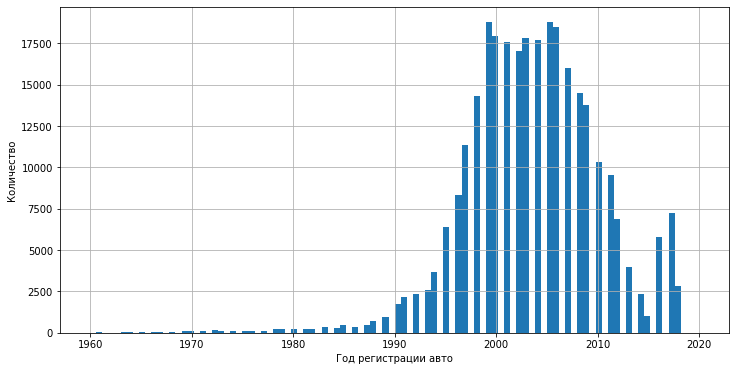

In [147]:
fig, ax = plt.subplots()
data['registrationyear'].plot(kind = 'hist', bins = 100, grid = True, range =(1960, 2020), figsize = (12, 6))
ax.set_xlabel('Год регистрации авто')
ax.set_ylabel('Количество')

<font color="green">Комментарий ревьювера   
✔️ Молодец, хорошие выводы. Согласен с заменой пропусков в NotRepaired на 'no', хотя чаще используют 'unknown'</font>

<font color="brown">Комментарий ревьювера   
⚠️ Не всегда стоит удалять пропуски, это потеря данных в других колонках. Возможно, лучше заменить на 'unknown' или проверить оба варианта :)   </font>
    
<font color="red">Комментарий ревьювера   
❌ Еще очень рекомендую посмотреть данные с помощью функции describe(). Возможно, ты пропустил аномалии, странные значения (точно пропустил).   
Причем при обычном применении без параметров она покажет описание только числовых значений, но если написать c параметром, то увидешь все типы данных :)    
df.describe(include = ['object', 'float', 'int'])   
Хорошее описание тут http://espressocode.top/python-pandas-dataframe-describe-method/</font>


<div class="alert alert-info"> <b>Комментарий студента:</b> Ты прав! в столбцах мощность и цена есть выбросы. Постарался от них избавиться. Потерялось моного данных. Хотел эти нули заменить как ниже заменял пропуски по совпадениям из соседних столбцов, но у меня не получилось </div>  

<font color="brown">Комментарий ревьювера 2   
⚠️ Здесь еще с годом RegistrationYear проблемы...    </font>

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Год регистрации поправил </div>  

<font color="green">Комментарий ревьювера 3   
✔️ Отлично.</font>

In [96]:
#удаление дубликатов
data.drop_duplicates(inplace = True)
#замена значений в столбце notrepaired
data['notrepaired'] = data['notrepaired'].fillna('no')


In [97]:
#удаление пропусков
#data = data.dropna().reset_index(drop=True)

In [98]:
# в интернете нашел способ заполнения пропусков  по значениям других столбцов. 
#С виду все работает. поэтому удалениe пропусков предварительно закоментил.
def fill_with_mode(column, column1, column2):
    data[column] = data.groupby([column1, column2])[column].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

<font color="green">Комментарий ревьювера   
✔️ Молодец, отличное решение! Функция mode() особенно удобна для категориальных признаков - оно дает значение, которое чаще всего встречается в наборе данных</font>

In [99]:
fill_with_mode('model', 'brand', 'registrationyear')
fill_with_mode('fueltype', 'brand', 'model')
fill_with_mode('vehicletype', 'brand', 'model')
fill_with_mode('gearbox', 'brand', 'model')

In [100]:
#print(data.isna().sum())
#display(data.info())

,price,registrationyear,power,kilometer,registrationmonth,numberofpictures,postalcode
price,1.000000,0.437035,0.503915,-0.394855,0.063395,NaN,0.063183
registrationyear,0.437035,1.000000,0.090841,-0.283017,0.018760,NaN,0.016945
power,0.503915,0.090841,1.000000,0.105356,0.037370,NaN,0.054170
kilometer,-0.394855,-0.283017,0.105356,1.000000,-0.015939,NaN,-0.012288
registrationmonth,0.063395,0.018760,0.037370,-0.015939,1.000000,NaN,0.002137
numberofpictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalcode,0.063183,0.016945,0.054170,-0.012288,0.002137,NaN,1.000000


________________________________________________


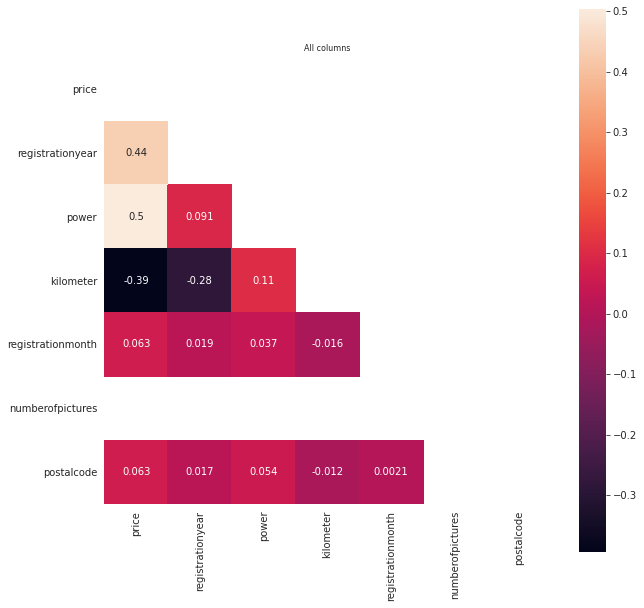

In [148]:
data_corr = data.corr()
display(data_corr)
line()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(data_corr, mask=mask, square=True,annot=True)
    plt.title("All columns", fontsize =8)



Данные обработаны. Дубликаты удалены, пропуски заполнены.

<font color="brown">Комментарий ревьювера ⚠️   
Хорошо бы еще проверить корреляцию столбцов</font>

<font color="red">Комментарий ревьювера ❌  
Еще смутили месяцы, которые изменяются от 0 до 12 :)</font>


<div class="alert alert-info"> <b>Комментарий студента:</b> Корреляцию проверил, вроде все ок </div>  

<div class="alert alert-info"> <b>Комментарий студента:</b> С месяцами беда случилась. Могу предположить, что для части данных использовался диапазон 0-11 а для другой части 1-12 как это исправить я не понимаю. </div>  

<font color="brown">Комментарий ревьювера 2 ⚠️   
Да. Можно просто отметить этот факт и удалить :)</font>

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Ты имеешь ввиду удалисть весь столбец? </div>  

<font color="green">Комментарий ревьювера 3   
✔️ Да, можно удалить месяцы. Эта информация никак не влияет на результат :)(.</font>

## Обучение моделей

### Подготовка выборок и признаков

Признаки:
- 'vehicletype'
- 'registrationyear'
- 'gearbox'
- 'model'
- 'fueltype'
- 'brand'
- 'notrepaired'
- 'power'
- 'kilometer'

Целевой признак:
- 'price'

In [102]:
# удаление не нужных столбцов
data = data.drop(['datecrawled', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen'], axis=1)

Эти стобцы решил удалить так как они не несут информации, влияющей на решение нашей задачи
- DateCrawled — дата скачивания анкеты из базы
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

<font color="brown">Комментарий ревьювера   
⚠️ Согласен, но всегда желательно  пояснять, почему ты считаешь эти столбцы не нужными. Например - их данные не несут информации, влияющей на решение нашей задачи</font>


<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил. </div> 

<font color="green">Комментарий ревьювера 2   
✔️ Хорошо!</font>

In [103]:
#прямое кодирование

data_ohe = (
    pd.get_dummies(data, drop_first = True, 
    columns =['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired'])
)
data_ohe.head(5)



,price,registrationyear,power,kilometer,registrationmonth,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_yes
1,18300,2011,190,125000,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,2001,75,150000,6,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3600,2008,69,90000,7,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,650,1995,102,150000,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297503 entries, 1 to 354368
Columns: 308 entries, price to notrepaired_yes
dtypes: int64(5), uint8(303)
memory usage: 99.6 MB


<font color="green">Комментарий ревьювера   
✔️ Хорошо, столбцы для категорирования выбраны верно.</font>


cats_cols = list(data.select_dtypes(include='object').columns)
label_encode = LabelEncoder()
for column in cats_cols:
    label_encode.fit(data[column].astype('str'))
    data[column] = label_encode.transform(data[column].astype('str'))

In [105]:
#разделение выборки на обучающу, валидационную и тестовую
#определение признаков
features = data_ohe.drop('price', axis=1)
target = data_ohe['price']

# Получение пропорции 60:40

features_train, features_40, target_train, target_40 = train_test_split(
    features, target, test_size = 0.40, random_state = 12345)

# Разделение 40 % на две части

features_valid, features_test, target_valid, target_test = train_test_split(
    features_40, target_40, test_size = 0.50, random_state = 12345)




In [106]:
# Масштабирование признаков
numeric = (
    ['registrationyear', 'power', 'kilometer', 'registrationmonth']
)

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<font color="green">Комментарий ревьювера   
✔️ Масштабирование правильное. Хорошо, что используешь его после разбиения на выборки, это позволяет избежать утечек данных и "подглядывание в будущее".</font>



In [107]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297503 entries, 1 to 354368
Columns: 307 entries, registrationyear to notrepaired_yes
dtypes: int64(4), uint8(303)
memory usage: 97.3 MB


### LightGBM регресия

In [108]:
#%%time

#regressor = LGBMRegressor() 
#hyperparams = [{'num_leaves':[31, 100, 200], 
#                'learning_rate':[0.1, 0.3, 0.5],
#                'random_state':[RND]}]

#print('# Подбор гиперпараметров для получения лучшей метрики')
#line()
#clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error')
#clf.fit(features_train, target_train)
#print("Лучший RMSE получается при следуюших параметрах:")
#print(clf.best_params_)
#line()
#print("Проверенные параметры:")
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.6f for %r"% ((mean*-1)** 0.5, params))
#print()

#cv_RMSE_LGBMR = (max(means)*-1) ** 0.5
cv_RMSE_LGBMR = 1570

 Подбор гиперпараметров для получения лучшей метрики
________________________________________________
Лучший RMSE получается при следуюших параметрах:

{'learning_rate': 0.3, 'num_leaves': 200, 'random_state': 12345}
________________________________________________
Проверенные параметры:

1694.887033 for {'learning_rate': 0.1, 'num_leaves': 31, 'random_state': 12345}

1607.104554 for {'learning_rate': 0.1, 'num_leaves': 100, 'random_state': 12345}

1570.812330 for {'learning_rate': 0.1, 'num_leaves': 200, 'random_state': 12345}

1639.761839 for {'learning_rate': 0.3, 'num_leaves': 31, 'random_state': 12345}

1579.845849 for {'learning_rate': 0.3, 'num_leaves': 100, 'random_state': 12345}

1570.727501 for {'learning_rate': 0.3, 'num_leaves': 200, 'random_state': 12345}

1632.229214 for {'learning_rate': 0.5, 'num_leaves': 31, 'random_state': 12345}

1607.801277 for {'learning_rate': 0.5, 'num_leaves': 100, 'random_state': 12345}

1609.251316 for {'learning_rate': 0.5, 'num_leaves': 200, 'random_state': 12345}

CPU times: user 50min 19s, sys: 25.7 s, total: 50min 45s

Wall time: 51min 3s


<font color="green">Комментарий ревьювера 2   
✔️ Верно! Хорошо, что ты умеешь применть cv_results_ (словарь всех метрик оценки из gridsearch)</font>

<font color="brown">Комментарий ревьювера    
⚠️ Желательно заменить признаки со значениями типа object на category   
Желательно вынести random_state в константы

Еще совет. Ревьюверы перезапускают проекты и если есть GridSearchCV - выполнение кода может затянуться на часы, как здесь и вышло. На будущее - лучше закомментировать GridSearchCV и вручную указать полученные тобой лучше параметры :)</font> 

<div class="alert alert-info"> <b>Комментарий студента:</b> вывел random_state в константы. dtypes: int64(4), uint8(306) не совсем понял что нужно изменить. Все закоментил извиняюсь) </div> 

<font color="green">Комментарий ревьювера 2     
✔️ Хорошо. Порядковое кодирование работает лучше с данными типа "category"</font>



### CatBoost регресия

In [109]:
#%%time

#regressor = CatBoostRegressor() 
#hyperparams = [{'learning_rate':[0.1, 0.5, 0.8],
#                'random_state':[RND],
#                'verbose':[False]}]

#print('# Подбор гиперпараметров для получения лучшей метрики')
#line()
#clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error')
#clf.fit(features_train, target_train)
#print("Лучший RMSE получается при следуюших параметрах:")
#print(clf.best_params_)
#line()
#print("Проверенные параметры::")
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.6f for %r"% ((mean*-1)** 0.5, params))


#cv_RMSE_CBR = (max(means)*-1) ** 0.5
cv_RMSE_CBR = 1577

 Подбор гиперпараметров для получения лучшей метрики
________________________________________________
Лучший RMSE получается при следуюших параметрах:

{'learning_rate': 0.5, 'random_state': 12345, 'verbose': False}
________________________________________________
Проверенные параметры::
1605.475215 for {'learning_rate': 0.1, 'random_state': 12345, 'verbose': False}

1577.107882 for {'learning_rate': 0.5, 'random_state': 12345, 'verbose': False}

1606.051665 for {'learning_rate': 0.8, 'random_state': 12345, 'verbose': False}

CPU times: user 9min 56s, sys: 3.13 s, total: 10min

Wall time: 10min 32s

<font color="green">Комментарий ревьювера   
✔️ Хорошо</font>


### XGBRegressor

In [110]:
#%%time

#regressor = XGBRegressor() 
#hyperparams = [{'learning_rate':[0.1, 0.5, 0.8],
#                'random_state':[RND]}]

#print('# Tuning hyper-parameters for root_mean_squared_error')
#print()
#clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error')
#clf.fit(features_train, target_train)
#print("Best parameters set found on development set:")
#print()
#print(clf.best_params_)
#print()
#print("Grid scores on development set:")
#print()
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.6f for %r"% ((mean*-1)** 0.5, params))
#print()

#cv_RMSE_XGBR = (max(means)*-1) ** 0.5

cv_RMSE_XGBR = 1646


 Tuning hyper-parameters for root_mean_squared_error

Best parameters set found on development set:

{'learning_rate': 0.5, 'random_state': 12345}

Grid scores on development set:

1708.767804 for {'learning_rate': 0.1, 'random_state': 12345}

1646.474289 for {'learning_rate': 0.5, 'random_state': 12345}

1673.735786 for {'learning_rate': 0.8, 'random_state': 12345}

CPU times: user 2h 47s, sys: 20 s, total: 2h 1min 7s

Wall time: 2h 1min 22s

<font color="brown">Комментарий ревьювера   
⚠️ В целом хорошо, но для LightGBM, CatBoost, и XGBRegressor обычно лучше применять порядковое кодирование (OrdinalEncoder). 
    
Также еще удобно бывает использовать cross_val_score с scoring='neg_root_mean_squared_error'.</font>

## Анализ моделей

Для анализа моделей проведу обучение с лучшими гиперпараметрами

### LightGBM

In [111]:
#%%time
start = time.time()
model = LGBMRegressor(learning_rate=0.3, 
                      num_leaves=200, 
                      random_state=RND)
model.fit(features_train, target_train)
end = time.time()
time_l_LGBMR = end - start

In [112]:
#%%time
start = time.time()
predict_valid = model.predict(features_valid)
end = time.time()
time_pred_LGBMR = end - start

In [113]:
final_RMSE_LGBMR = mse(target_valid, predict_valid, squared=False)


<font color='brown'><font color="brown">Комментарий ревьювера   
⚠️ MSE ** 0.5 выглядит странно, там же есть параметр squared=False.</font><br>
    

<font color="red">Комментарий ревьювера   
❌ RMSE на тестовой выборке не делают, нужно на валидационной. Или можно задать кросс-валидацию в гридсёрч scoring='neg_root_mean_squared_error' и взял best_score_.    
Посмотри внимательно на выборки - у тебя их 3, а ты используешь везде только 2 :)  Я бы рекомендовал на тестовой потом проверить итоговые данные</font>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил на валидационную выборку.

Не совсем понял как проверитьна тестовой выборке итоговые данные?
</div> 

<font color="red">Комментарий ревьювера 2   
❌ Вспомни раздел "Обучение с учителем" :) Просто загоняешь в предсказание модели тестовые данные и смотришь - измменились результаты относительно обучения или нет. Только надо сверять и таргет и предикт - тестовые :)</font>



<div class="alert alert-info"> <b>Комментарий студента 2:</b> Вроде бы разобрался и все исправил.
</div> 

<font color="green">Комментарий ревьювера 3   
✔️ Отлично.</font>

In [114]:
predict_test = model.predict(features_test)
t_RMSE_LGBMR = mse(target_test, predict_test, squared=False)

### CatBoost

In [115]:
#%%time
start = time.time()
model = CatBoostRegressor(learning_rate=0.5, 
                          random_state=RND, 
                          verbose=False) 
model.fit(features_train, target_train)
end = time.time()
time_l_CBR = end - start

In [116]:
#%%time
start = time.time()
predict_valid = model.predict(features_valid)
end = time.time()
time_pred_CBR = end - start


In [117]:
final_RMSE_CBR = mse(target_valid, predict_valid, squared=False)

In [118]:
predict_test = model.predict(features_test)
t_RMSE_CBR = mse(target_test, predict_test, squared=False)

### XGBRegressor

In [119]:
#%%time
start = time.time()
model = XGBRegressor(learning_rate=0.5, 
                          random_state=RND) 
model.fit(features_train, target_train)
end = time.time()
time_l_XGBR = end - start

In [120]:
#%%time
start = time.time()
predict_valid = model.predict(features_valid)
end = time.time()
time_pred_XGBR = end - start

In [121]:
final_RMSE_XGBR = mse(target_valid, predict_valid, squared=False)

In [122]:
predict_test = model.predict(features_test)
t_RMSE_XGBR = mse(target_test, predict_test, squared=False)

### Сравнительная таблица

In [123]:
index = ['LGBMRegressor', 
         'CatBoostRegressor', 
         'XGBRegressor']
data = {'RMSE на CV':[cv_RMSE_LGBMR, 
                      cv_RMSE_CBR, 
                      cv_RMSE_XGBR],
        'Время обучения на CV, мин':[51, 
                                     10, 
                                     121],
        'RMSE модели на валидационной выборке':[final_RMSE_LGBMR,
                                           final_RMSE_CBR,
                                           final_RMSE_XGBR],
        'Время обучения модели, сек':[time_l_LGBMR,
                                      time_l_CBR,
                                      time_l_XGBR],
        'Время предсказания модели, сек':[time_pred_LGBMR,
                                          time_pred_CBR,
                                          time_pred_XGBR],
        'RMSE модели на тестовой выборке':[t_RMSE_LGBMR,
                                           t_RMSE_CBR,
                                           t_RMSE_XGBR]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data

,RMSE на CV,"Время обучения на CV, мин",RMSE модели на валидационной выборке,"Время обучения модели, сек","Время предсказания модели, сек",RMSE модели на тестовой выборке
LGBMRegressor,1570,51,1548.969034,287.558214,0.801394,1559.001025
CatBoostRegressor,1577,10,1558.623015,25.543824,0.115901,1554.620034
XGBRegressor,1646,121,1634.123614,354.418941,0.869751,1633.351994


### Вывод

Лучший показатель RMSE  на валидационной выборке получился на модели LGBMRegressor	 с learning_rate=0.3, num_leaves=200, random_state=12345.

Лучший показатель RMSE модели на тестовой выборке получился на модели CatBoostRegressor, так же данная модель является самой быстрой.

Хуже всего себя проявила модель XGBRegressor. Худший показатель RMSE и долгое время обучения и предсказания

RMSE модели LGBMRegressor ухудшилось на тестовой выбокре по сравнению с валидационной.

<font color="brown">Комментарий ревьювера   
⚠️ Ввод времени вручную - не самый лучший способ. Я понимаю, что использование %%time - удобно. Но лучше все-таки автоматизироваnь. Можно с помощью простого start_time = datetime.now()</font>

<font color="red">Комментарий ревьювера   
❌ Хорошо бы написать окончательный вывод - какой метод лучше всего сработал и с какими параметрами

Посмотри еще раз на данные. Там точно еще есть аномалии :)
</font>

<div class="alert alert-info"> <b>Комментарий студента:</b> Вывод добавил, от аномалий избавился.

Ввод времени автоматизировал, но гридсерч не стал так делать не хватает терпения ждать еще раз.

Не могу сообразить почему  RMSE модели на валидационной выборке получается  в несколько раз хуже?
    
Время обучения на гридсерч выросло примерно в 1.5 раза после избавления от выбросов. Почему?
    

</div> 

<font color='brown'><font color="brown">Комментарий ревьювера 2  
⚠️ Написал в начале раздела 4  Анализ моделей. Все будет нормально :)

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Подскажи, пожалуйста, почему при вторичном прогоне кода время обучения модели LGBMRegressor уменьшается в два раза, а на других моделях время остается неизменным? при первичном прогоне 800 сек и при вторичном 290.
</div> 

<font color="green">Комментарий ревьювера 3   
✔️ Вижу, данные RMSE теперь верные, ок.

По времени сказать не смогу, нужно перезапустить код для экспериментов, но это странно. Т.к. обучение очень длинное, то можно попробовать поэкспериментировать -  сделай игрушечный датасет из 100 строк. Например можешь взять от сюда самые важные столбцы - цену, мощность и год регистрации и проверить :)

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей

<font color='green'>Молодец, хорошая работа над проектом, выполнены все пункты задания. Хорошая работа с моделями, применены полезные и удобные функции. Есть небольшие замечания, но это ничего страшного, их исправление позволит сделать проект лучше и хорошо разобраться в теме. </font>

Принимаем!